root_0
False_0

root_0
a_1

a_1
False_2

root_3
False_3

root_3
a_4

a_4
False_5

a_4
s_6

s_6
False_7

root_8
False_8

root_8
a_9

a_9
False_10

a_9
s_11

s_11
False_12

s_11
d_13

d_13
False_14

{'root': {'end': 'False', 'a': {'end': 'False', 's': {'end': 'False', 'd': {'end': 'True'}}}}}
root_15
False_15

root_15
a_16

a_16
False_17

a_16
s_18

s_18
False_19

s_18
d_20

d_20
True_21

root_22
False_22

root_22
a_23

a_23
False_24

a_23
s_25

s_25
False_26

s_25
d_27

d_27
True_28

root_29
False_29

root_29
a_30

a_30
False_31

a_30
s_32

s_32
False_33

s_32
d_34

d_34
True_35

root_29
w_36

w_36
False_37

root_38
False_38

root_38
a_39

a_39
False_40

a_39
s_41

s_41
False_42

s_41
d_43

d_43
True_44

root_38
w_45

w_45
False_46

w_45
b_47

b_47
False_48

root_49
False_49

root_49
a_50

a_50
False_51

a_50
s_52

s_52
False_53

s_52
d_54

d_54
True_55

root_49
w_56

w_56
False_57

w_56
b_58

b_58
False_59

b_58
o_60

o_60
False_61

{'root': {'end': 'False', 'a': {'end': 'False', 's': 

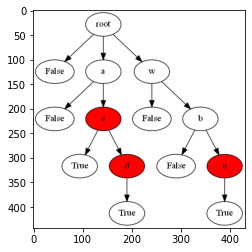

In [4]:
# %load trie.py

#imports
import json
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

counter = 0

def draw(parent_name, child_name):
#     print(1)
    global counter
    counter += 1
    p_n = parent_name
    c_n = child_name
    print(p_n)
    print(c_n)
    print()
    col=""
    
#         print(p_n)
#         print(c_n)
#         print()
    
    
    par=pydot.Node(p_n, label=parent_name.split('_')[0])
    chi=pydot.Node(c_n, label=child_name.split('_')[0])
    graph.add_node(par)
    graph.add_node(chi)
    
    if(child_name.split('_')[0]=="True"):
        col="red"
        par.set_style('filled')
        par.set_fillcolor(col)
        
    edge = pydot.Edge(p_n, c_n)
    graph.add_edge(edge)

def visit(node, parent=None):
    global counter
    for k,v in node.items():
#         print(k)
#         print(v)
#         print()
        if isinstance(v, dict):
            # We start with the root node whose parent is None
            # we don't want to graph the None node
            k = k + '_' + str(counter)
            if parent:
                draw(parent, k)
            visit(v, k)
        else:
            # drawing the label using a distinct name
            v = v + '_' + str(counter)
            draw(parent, v)
# function to return a new dict template
def struct():
    struct = {
        'end': 'False'
    }
    return struct

# getting list of words as input from the file
file_ = open('input.txt', 'r')
file_text = file_.read()
file_len = len(file_text)
file_.close()

# trie making stuff happening (hard to explain)
tmp_s = struct()
root = tmp_s
for c in file_text:
    if c != '\n':
        if c not in tmp_s:
            tmp_s[c] = struct()
        tmp_s = tmp_s[c]
        
        graph = pydot.Dot(graph_type='digraph')
        rt={'root':root}
#         print(rt)
        visit(rt)
        graph.write_png('output.png')
        img = cv2.imread("output.png", cv2.IMREAD_ANYCOLOR)
        cv2.imshow("TRIE", img)
        cv2.waitKey(0)
        
    elif c == '\n':
        tmp_s['end'] = 'True'
        tmp_s = root
        cur_word = []
        
        graph = pydot.Dot(graph_type='digraph')
        rt={'root':root}
        print(rt)
        visit(rt)
        graph.write_png('output.png')
        img = cv2.imread("output.png", cv2.IMREAD_ANYCOLOR)
        cv2.imshow("TRIE", img)
        cv2.waitKey(0)
#         sys.exit()
        
        graph = pydot.Dot(graph_type='digraph')
        rt={'root':root}
        visit(rt)
        graph.write_png('output.png')
        plt.imshow(mpimg.imread('output.png'))
        
        

# converting and saving the trie to dot language decision tree graph using pydot
# // code taken and modified from stackoverflow (https://stackoverflow.com/questions/13688410/dictionary-object-to-decision-tree-in-pydot)
rt = {'root': root}
print(rt)


# graph = pydot.Dot(graph_type='digraph')
# print(type(rt))
# visit(rt)
# graph.write_png('output.png')
# plt.figure(figsize=(10,6))
# plt.imshow(mpimg.imread('output.png'))

# end of program
